# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Reading the dataset

In [3]:
data = pd.read_csv("C:\\Users\Dell\\OneDrive\\Desktop\\Book2.csv")
data.head()

,#,Patient Id,Indications,Onboarding Date,Age,Gender,Height,Weight,Language Spoken,Onboarding Time,Doctor Id,Doctor Gender,Doctor City,Doctor State
0,1,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,31-08-2023,50,F,165.0,77.0,English,11:54:23,609dd764-f93a-11ed-9614-86c4450e7523,M,GHAZIABAD,UTTAR PRADESH
1,2,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,26-09-2023,45,M,172.0,75.0,English,20:13:46,69193aaa-eeea-11ed-9614-86c4450e7523,M,DELHI I,Delhi
2,3,003111e5-5ba2-11ee-bf18-7b40cd44ecd5,Diabetes,25-09-2023,39,F,NaN,NaN,English,18:20:24,0bb89ed6-eeee-11ed-9614-86c4450e7523,M,LUDHIANA,Punjab
3,4,0050c2ea-41b5-11ee-bf18-7b40cd44ecd5,Diabetes,23-08-2023,67,M,NaN,NaN,English,18:30:16,7e421c0e-eef3-11ed-9614-86c4450e7523,M,SILIGURI,West Bengal
4,5,005e06c0-3753-11ee-a67f-f4ce2d75c16b,Fatty Liver - NAFL,10-08-2023,60,M,NaN,NaN,English,13:24:59,b12294f7-f939-11ed-9614-86c4450e7523,M,WADALA,MAHARASHTRA


# #  Data cleaning Process

# Identifying missing values

In [4]:
data.isnull().sum()

#                     0
Patient Id            0
Indications           0
Onboarding Date       0
Age                   0
Gender                0
Height             2900
Weight             2900
Language Spoken       0
Onboarding Time       0
Doctor Id             0
Doctor Gender         4
Doctor City           4
Doctor State          4
dtype: int64

We have missing values in data in height,weight,doctor city,doctor state columes. We can handle it by replacing it with mean.

# Filling all missing values using Mean

In [5]:
a = data['Height'].mean()
data['Height'].fillna(a, inplace = True)

b = data['Weight'].mean()
data['Weight'].fillna(b, inplace = True)


In [6]:
data.isnull().sum()

#                  0
Patient Id         0
Indications        0
Onboarding Date    0
Age                0
Gender             0
Height             0
Weight             0
Language Spoken    0
Onboarding Time    0
Doctor Id          0
Doctor Gender      4
Doctor City        4
Doctor State       4
dtype: int64

# we have removed all the missing values for height and weight

# Removing the unwanted columns from data

In [7]:
column_to_drop = '#'
data = data.drop(column_to_drop, axis=1)

In [8]:
data.head()

,Patient Id,Indications,Onboarding Date,Age,Gender,Height,Weight,Language Spoken,Onboarding Time,Doctor Id,Doctor Gender,Doctor City,Doctor State
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,31-08-2023,50,F,165.000000,77.000000,English,11:54:23,609dd764-f93a-11ed-9614-86c4450e7523,M,GHAZIABAD,UTTAR PRADESH
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,26-09-2023,45,M,172.000000,75.000000,English,20:13:46,69193aaa-eeea-11ed-9614-86c4450e7523,M,DELHI I,Delhi
2,003111e5-5ba2-11ee-bf18-7b40cd44ecd5,Diabetes,25-09-2023,39,F,164.773615,73.095419,English,18:20:24,0bb89ed6-eeee-11ed-9614-86c4450e7523,M,LUDHIANA,Punjab
3,0050c2ea-41b5-11ee-bf18-7b40cd44ecd5,Diabetes,23-08-2023,67,M,164.773615,73.095419,English,18:30:16,7e421c0e-eef3-11ed-9614-86c4450e7523,M,SILIGURI,West Bengal
4,005e06c0-3753-11ee-a67f-f4ce2d75c16b,Fatty Liver - NAFL,10-08-2023,60,M,164.773615,73.095419,English,13:24:59,b12294f7-f939-11ed-9614-86c4450e7523,M,WADALA,MAHARASHTRA


# Calculating Statistical insight from data

In [9]:
data.describe()

,Age,Height,Weight
count,5716.000000,5716.000000,5716.000000
mean,44.973058,164.773615,73.095419
std,13.699371,7.574338,9.819497
min,18.000000,111.000000,30.000000
25%,35.000000,164.773615,73.095419
50%,43.000000,164.773615,73.095419
75%,54.000000,165.000000,73.095419
max,92.000000,259.000000,275.000000


# From Above Table we get max,min,and mean of each variable

# Calculating Data types of each variable present in data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient Id       5716 non-null   object 
 1   Indications      5716 non-null   object 
 2   Onboarding Date  5716 non-null   object 
 3   Age              5716 non-null   int64  
 4   Gender           5716 non-null   object 
 5   Height           5716 non-null   float64
 6   Weight           5716 non-null   float64
 7   Language Spoken  5716 non-null   object 
 8   Onboarding Time  5716 non-null   object 
 9   Doctor Id        5716 non-null   object 
 10  Doctor Gender    5712 non-null   object 
 11  Doctor City      5712 non-null   object 
 12  Doctor State     5712 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 580.7+ KB


# #EDA process

# Histogram

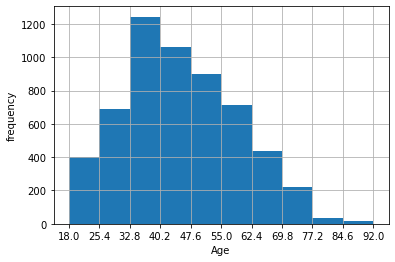

In [17]:
count, bin_edges = np.histogram(data['Age'])
data['Age'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.grid()
plt.show()

# Interpretation:From above histogram we can say that most of the data is distributed between age group of 32 to 40

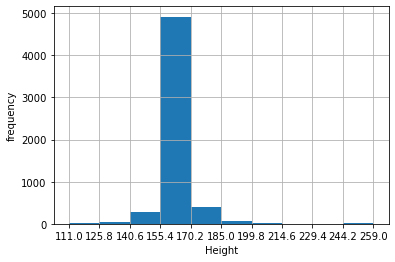

In [19]:
count, bin_edges = np.histogram(data['Height'])
data['Height'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('Height')
plt.ylabel('frequency')
plt.grid()
plt.show()

# Height of most of the patients lies within the range of 15.5 to 17  

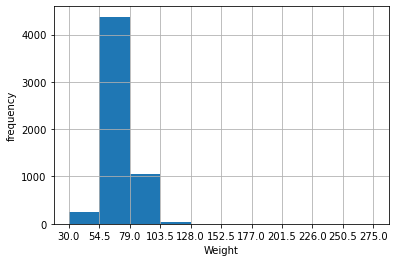

In [22]:
count, bin_edges = np.histogram(data['Weight'])
data['Weight'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('Weight')
plt.ylabel('frequency')
plt.grid()
plt.show()

# Weight of most of the patients lies within the range of 54.5 to 79.0  

# #Correlation Between two variables

# Scater Plot

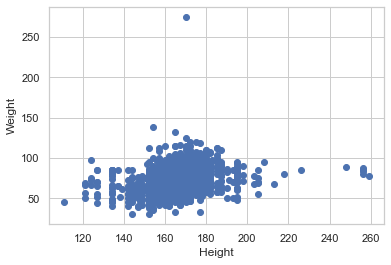

In [32]:
plt.scatter(data['Height'],data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [33]:
correlation = data['Height'].corr(data['Weight'])
correlation 

0.2581018027712036

# From scater plot and correlation we conclude that height and weight are positively correlated with each other.That is as height increases weight also increases

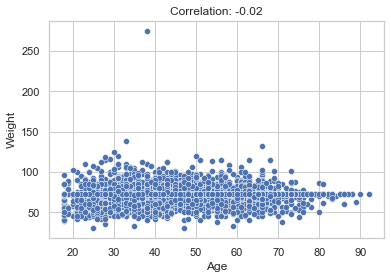

In [27]:
# Create a scatter plot
sns.set(style="whitegrid")
sns.scatterplot(x='Age', y='Weight', data=data)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

In [34]:
correlation = data['Age'].corr(data['Weight'])
correlation

-0.019977894855063072

# # From scater plot and correlation we conclude that age and weight are negatively correlated with each other.

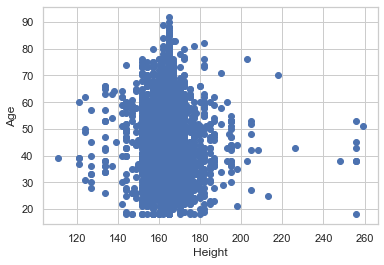

In [35]:
plt.scatter(data['Height'],data['Age'])
plt.xlabel('Height')
plt.ylabel('Age')
plt.show()

In [36]:
correlation = data['Age'].corr(data['Height'])
correlation

-0.051573366567830604

# Boxplot(outlier)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

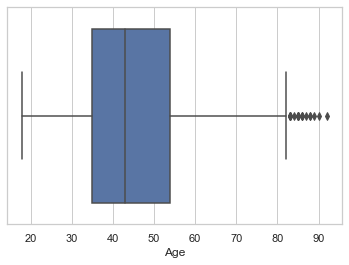

In [37]:
sns.boxplot('Age',data=data)

# With the help of boxplot we identify the outlier from the data

# Visualisation

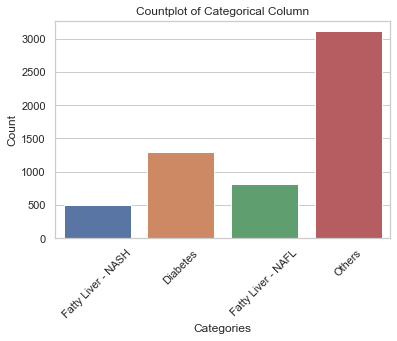

In [42]:
sns.countplot(x='Indications', data=data)
plt.title('Countplot of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Most Of the Patient lies within 'other' category followed by Diabetes.

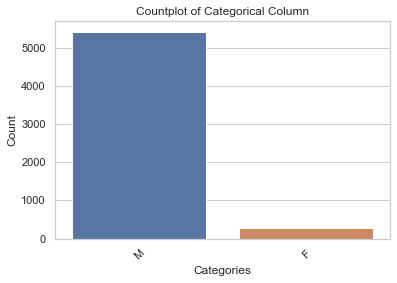

In [44]:
sns.countplot(x='Doctor Gender', data=data)
plt.title('Countplot of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Male Doctors are prominent as compared to female doctors for treating the patients

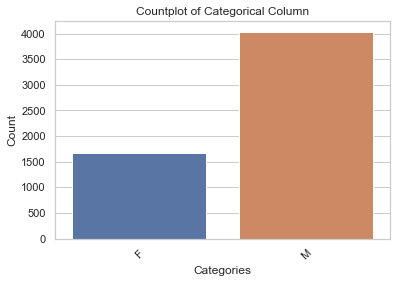

In [45]:
sns.countplot(x='Gender', data=data)
plt.title('Countplot of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Male patients are more than female patients from our data

# #Patient Segmentation

In [11]:
#Imputing null values in height column by group means.

grouped_means = data.groupby('Gender')['Height'].transform('mean')
data['Height'].fillna(grouped_means, inplace=True)

In [12]:
#Imputing null values in Weight column by group means.

grouped_means = data.groupby('Gender')['Weight'].transform('mean')
data['Weight'].fillna(grouped_means, inplace=True)

In [13]:
#Adding a BMI variable from Height and Weight variable.

data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

In [14]:
from sklearn.preprocessing import StandardScaler

# feature selection for clustering
features = data[['BMI','Age']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

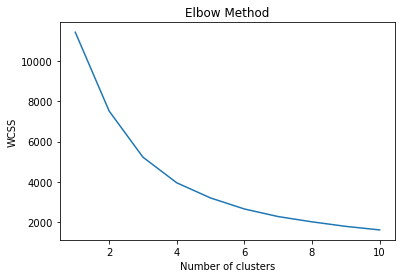

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []     #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# So Based on Elbow Method 
k = 3
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Print the count of patients in each cluster
print(data['Cluster'].value_counts())

Cluster
0    2585
1    2186
2     945
Name: count, dtype: int64


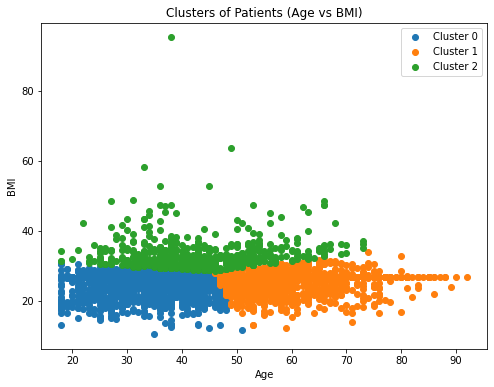

In [17]:
# Visualize clusters using scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['BMI'], label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Clusters of Patients (Age vs BMI)')
plt.legend()
plt.show()

# In summary, K-means clustering is a data exploration and analysis technique that automatically groups data points into clusters based on their similarities. It's a versatile tool with various applications and can provide valuable insights into the underlying structure of your data.